# Explore here

                        Track Name     Artist  \
0                Army of the Night  Powerwolf   
1        Sinners of the Seven Seas  Powerwolf   
2  Demons Are a Girl's Best Friend  Powerwolf   

                                 Album  Popularity Release Date  Duration  
0                  Blessed & Possessed          61   2015-07-17     201.0  
1  Wake Up The Wicked (Deluxe Version)          52   2024-07-26     181.0  
2                 The Sacrament of Sin          59   2018-07-20     218.0  


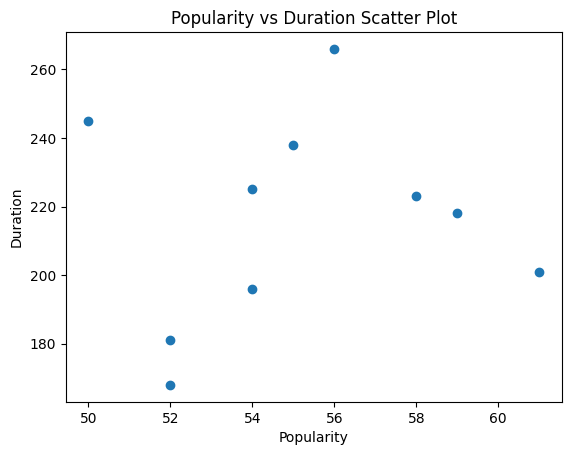

In [1]:
import os
from typing import Any
import pandas as pd
from dotenv import load_dotenv
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()

client_id = os.getenv('SPOTIFY_CLIENT_ID')
client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')

spotify = sp.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

def get_artist_id_by_name(artist_name : str) -> (dict | None):
    result = spotify.search(q='artist:' + artist_name, type='artist', limit=1)
    if result['artists']['items']:
        return result['artists']['items'][0]['id']
    else:
        print("Artist not found")
        return None
    
def get_top_10_songs(artist_name : str) -> list:
    artist_id = get_artist_id_by_name(artist_name)
    if artist_id:
        results = spotify.artist_top_tracks(artist_id)
        tracks = results['tracks']
        return tracks[:10] 
    else:
        return []
    
def get_song_names(track_list : list) -> list:
    return list(map(lambda x : x['name'], track_list))


def create_song_dictionary(track : Any) -> dict:
    track_dict = {
                'Track Name': track['name'],
                'Artist': track['artists'][0]['name'],
                'Album': track['album']['name'],
                'Popularity': track['popularity'],
                'Release Date': track['album']['release_date'],
                #The time is given in milliseconds and converted to seconds (no decimals)
                'Duration': float(round(track['duration_ms'] / 1000.0))
            }
    return track_dict
    

def create_most_popular_songs_data(name : str) -> pd.DataFrame:
    data_frame = pd.DataFrame(map(create_song_dictionary, get_top_10_songs(name)))
    data_frame.sort_values(by=['Popularity'])
    return data_frame


def create_simple_scatter_plot(x : pd.Series, y : pd.Series) -> None:
    plt.scatter(x, y)
    plt.title(f"{x.name} vs {y.name} Scatter Plot")
    plt.xlabel(x.name)
    plt.ylabel(y.name)

    plt.show()

#print(get_song_names(get_top_10_songs('Powerwolf')))

#Create a data frame and order by popularity(descending)
df = create_most_popular_songs_data('Powerwolf')
#Show the top 3
print(df.head(3))

create_simple_scatter_plot(df['Popularity'], df['Duration'])

